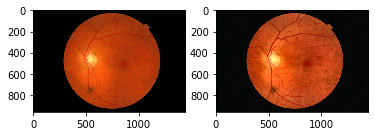

In [16]:
import cv2
import matplotlib.pyplot as plt

data_dir = '/home/hejiawen/datasets/Messidor/image/test/20051205_35408_0400_PP.tif'
img=cv2.imread(data_dir)
img_yuv = cv2.cvtColor(img, cv2.COLOR_BGR2YUV)
clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8,8))
img_yuv[:,:,0] = clahe.apply(img_yuv[:,:,0])
img_output = cv2.cvtColor(img_yuv, cv2.COLOR_YUV2BGR)

plt.subplot(121)
plt.imshow(img[:, :, ::-1])

plt.subplot(122)
plt.imshow(img_output[:, :, ::-1])
plt.show()

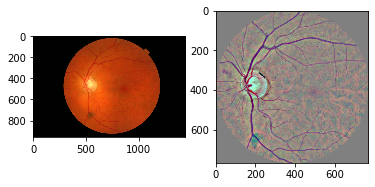

In [25]:
from data.preprocessing import classification_preprocessing

pre_option = {
        'crop_flag': True,
        'required_size': 768,
        'factor': 0.9,
        'pre_flag': 1,
        'strength_factor': 30,
    }

out_dict = classification_preprocessing(img, pre_option, debug=False)

if 'pre_img' in out_dict:
    pre_img = out_dict['pre_img']
    
plt.subplot(121)
plt.imshow(img[:, :, ::-1])

plt.subplot(122)
if len(pre_img.shape) == 3:
    plt.imshow(pre_img[:, :, ::-1])
else:
    plt.imshow(pre_img)
plt.show()

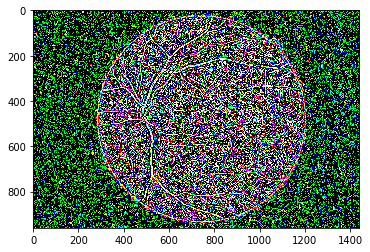

In [14]:
img_high = img - blur
plt.imshow(img_high[:, :, ::-1])
plt.show()

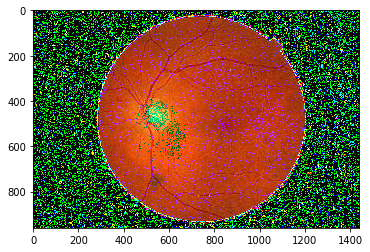

In [15]:
img_enhance = img + 4 * img_high
plt.imshow(img_enhance[:, :, ::-1])
plt.show()

In [5]:
# 中值滤波#
import cv2
import numpy as np

def MedianFilter(img,k=4,padding=None):
    imarray=img
    height = imarray.shape[0]
    width = imarray.shape[1]
    if not padding:
        edge = int((k - 1) / 2)
        if height - 1 - edge <= edge or width - 1 - edge <= edge:
            print("The parameter k is to large.")
            return None
        new_arr = np.zeros((height, width), dtype="uint8")
        for i in range(edge,height-edge):
            for j in range(edge,width-edge):
                new_arr[i, j] = np.median(imarray[i - edge:i + edge + 1, j - edge:j + edge + 1])# 调用np.median求取中值
    return new_arr


img = cv2.imread("AMD_processed/01619194/OCT/OPt.1.3.6.1.4.1.33437.10.4.4101000.13233201078.16646.4.14.1.dcm.jpg", 0)
result = MedianFilter(img)
cv2.imwrite('re-cat.jpg', result)
# median3 = cv2.medianBlur(result, 3)
# median5 = cv2.medianBlur(result, 5)
cv2.imshow("input", img)
cv2.imshow("output", result)
# cv2.imshow("Median3", median3)
# cv2.imshow("Median5", median5)
cv2.waitKey(0)
cv2.destroyAllWindows()